In [1]:
import pandas as pd
import numpy as np
from dateutil.parser import parse
from datetime import date

from matplotlib import pyplot as plt
from matplotlib.dates import date2num, num2date
from matplotlib import dates as mdates
from matplotlib import ticker
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch


In [2]:
df = pd.read_csv('../data/parsed/cases.csv', parse_dates=['date'], index_col='date')

In [3]:
df[df['region']=='Northern'].dropna()

,region,resident,nonresident,total
date,,,,
2020-03-03,Northern,0,0,0
2020-03-04,Northern,0,0,0
2020-03-05,Northern,0,0,0
2020-03-06,Northern,0,0,0
2020-03-07,Northern,0,0,0
...,...,...,...,...
2020-09-06,Northern,2,0,2
2020-09-07,Northern,4,0,4
2020-09-08,Northern,2,0,2


In [4]:
df = df[df['region']=='Statewide'].copy()

In [5]:
df = df.resample('1d').mean().fillna(0) # need true daily data for the smoothing 

In [6]:
df.tail()

,resident,nonresident,total
date,,,
2020-09-05,94.0,2.0,96.0
2020-09-06,33.0,1.0,34.0
2020-09-07,37.0,0.0,37.0
2020-09-08,62.0,0.0,62.0
2020-09-09,111.0,1.0,112.0


In [7]:
df['smoothed'] = df['nonresident'].rolling(7,
    win_type='gaussian',
    min_periods=1,
    center=True).mean(std=3).round()

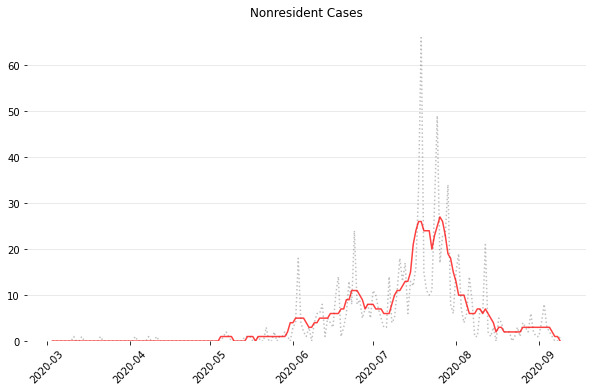

In [8]:
fig, ax = plt.subplots(figsize=(600/72,400/72))
ax.set_title('Nonresident Cases')
ax.plot(df.index, df['nonresident'], c='k', linestyle=':', zorder=1, alpha=.25)
ax.plot(df.index, df['smoothed'], c='r', linestyle='-', zorder=1, alpha=.75)

ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

x1,x2,y1,y2 = plt.axis()

plt.axis((x1,x2,0,y2))

ax.grid(which='major', axis='y', c='k', alpha=.1, zorder=-2)

fig.set_facecolor('w')
fig.autofmt_xdate(bottom=0.2, rotation=45, ha='center', which=None)
fig.tight_layout()

In [9]:
df.tail()

,resident,nonresident,total,smoothed
date,,,,
2020-09-05,94.0,2.0,96.0,3.0
2020-09-06,33.0,1.0,34.0,2.0
2020-09-07,37.0,0.0,37.0,1.0
2020-09-08,62.0,0.0,62.0,1.0
2020-09-09,111.0,1.0,112.0,0.0


In [10]:
df_tests = pd.read_csv('../data/parsed/tests.csv', parse_dates=['date'], index_col=['date'])

In [11]:
df_tests.tail()

,tests_ASPHL,tests_commercial,tests_POC,tests_total
date,,,,
2020-08-06,1710,1698,3812,7220
2020-08-07,2666,1371,713,4750
2020-08-08,1755,1131,1440,4326
2020-08-09,897,774,1019,2690
2020-08-10,1944,831,1472,4247


In [12]:
df_tests['smoothed'] = df_tests['tests_total'].rolling(7,
    win_type='gaussian',
    min_periods=1,
    center=True).mean(std=3).round()

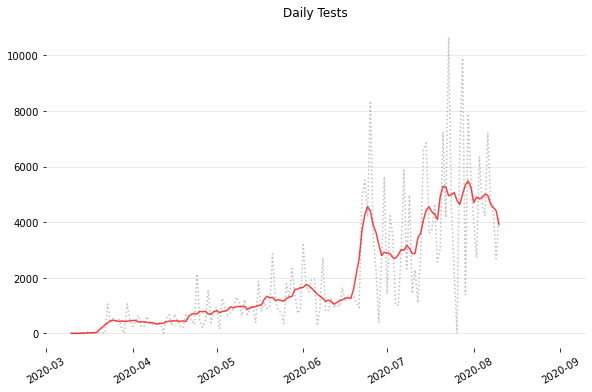

In [13]:
fig, ax = plt.subplots(figsize=(600/72,400/72))
ax.set_title('Daily Tests')
ax.plot(df_tests.index, df_tests['tests_total'], c='k', linestyle=':', zorder=1, alpha=.25)
ax.plot(df_tests.index, df_tests['smoothed'], c='r', linestyle='-', zorder=1, alpha=.75)

ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig.autofmt_xdate(ha='center', )

x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,y1,y2))

ax.grid(which='major', axis='y', c='k', alpha=.1, zorder=-2)

fig.set_facecolor('w')

ax.set_xlim(pd.Timestamp('2020-03-01'), date.today())
fig.tight_layout()